# Technical Analysis with Pandas ([pandas_ta](https://github.com/twopirllc/pandas-ta))
* Below contains examples of simple charts that can be made from pandas_ta indicators
* Examples below are for **educational purposes only**
* **NOTE:** The **watchlist** module is independent of Pandas TA. To easily use it, copy it from your local pandas_ta installation directory into your project directory.

In [ ]:
!pip uninstall yfinance

!pip install -U git+https://github.com/twopirllc/pandas-ta
!pip install git+https://github.com/ranaroussi/yfinance.git#egg=yfinance
    

In [1]:
%matplotlib inline
import datetime as dt
import random as rnd

from tqdm import tqdm
import numpy as np
import pandas as pd
import matplotlib.ticker as ticker
import mplfinance as mpf

from alphaVantageAPI.alphavantage import AlphaVantage
import pandas_ta as ta
from pandas_datareader import data as pdr

from watchlist import colors, Watchlist  # Is this failing? If so, copy it locally. See above.
from utils import *
print(f"\nPandas TA v{ta.version}\nTo install the Latest Version:\n$ pip install -U git+https://github.com/twopirllc/pandas-ta\n")

%pylab inline


Pandas TA v0.3.14b0
To install the Latest Version:
$ pip install -U git+https://github.com/twopirllc/pandas-ta

%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


/home/steven/anaconda3/lib/python3.9/site-packages/IPython/core/magics/pylab.py:162: UserWarning: pylab import has clobbered these variables: ['datetime']
`%matplotlib` prevents importing * from pylab and numpy
  warn("pylab import has clobbered these variables: %s"  % clobbered +


### List of Indicators (post an [issue](https://github.com/twopirllc/pandas-ta/issues) if the indicator doc needs updating)

In [2]:
e = pd.DataFrame()
e.ta.indicators()

Pandas TA - Technical Analysis Indicators - v0.3.14b0
Total Indicators & Utilities: 205
Abbreviations:
    aberration, above, above_value, accbands, ad, adosc, adx, alma, amat, ao, aobv, apo, aroon, atr, bbands, below, below_value, bias, bop, brar, cci, cdl_pattern, cdl_z, cfo, cg, chop, cksp, cmf, cmo, coppock, cross, cross_value, cti, decay, decreasing, dema, dm, donchian, dpo, ebsw, efi, ema, entropy, eom, er, eri, fisher, fwma, ha, hilo, hl2, hlc3, hma, hwc, hwma, ichimoku, increasing, inertia, jma, kama, kc, kdj, kst, kurtosis, kvo, linreg, log_return, long_run, macd, mad, massi, mcgd, median, mfi, midpoint, midprice, mom, natr, nvi, obv, ohlc4, pdist, percent_return, pgo, ppo, psar, psl, pvi, pvo, pvol, pvr, pvt, pwma, qqe, qstick, quantile, rma, roc, rsi, rsx, rvgi, rvi, short_run, sinwma, skew, slope, sma, smi, squeeze, squeeze_pro, ssf, stc, stdev, stoch, stochrsi, supertrend, swma, t3, td_seq, tema, thermo, tos_stdevall, trima, trix, true_range, tsi, tsignals, ttm_trend, ui, 

### Individual Indicator help

In [3]:
help(ta.obv)

Help on function obv in module pandas_ta.volume.obv:

obv(close, volume, talib=None, offset=None, **kwargs)
    On Balance Volume (OBV)
    
    On Balance Volume is a cumulative indicator to measure buying and selling
    pressure.
    
    Sources:
        https://www.tradingview.com/wiki/On_Balance_Volume_(OBV)
        https://www.tradingtechnologies.com/help/x-study/technical-indicator-definitions/on-balance-volume-obv/
        https://www.motivewave.com/studies/on_balance_volume.htm
    
    Calculation:
        signed_volume = signed_series(close, initial=1) * volume
        obv = signed_volume.cumsum()
    
    Args:
        close (pd.Series): Series of 'close's
        volume (pd.Series): Series of 'volume's
        talib (bool): If TA Lib is installed and talib is True, Returns the TA Lib
            version. Default: True
        offset (int): How many periods to offset the result. Default: 0
    
    Kwargs:
        fillna (value, optional): pd.DataFrame.fillna(value)
      

In [4]:
# # Function to format Millions
# def format_millions(x, pos):
#     "The two args are the value and tick position"
#     return "%1.1fM" % (x * 1e-6)

In [5]:
def ctitle(indicator_name, ticker="SPY", length=100):
    return f"{ticker}: {indicator_name} from {recent_startdate} to {recent_enddate} ({length})"

# # # All Data: 0, Last Four Years: 0.25, Last Two Years: 0.5, This Year: 1, Last Half Year: 2, Last Quarter: 3
# # yearly_divisor = 1
# # recent = int(ta.RATE["TRADING_DAYS_PER_YEAR"] / yearly_divisor) if yearly_divisor > 0 else df.shape[0]
# # print(recent)
# def recent_bars(df, tf: str = "1y"):
#     # All Data: 0, Last Four Years: 0.25, Last Two Years: 0.5, This Year: 1, Last Half Year: 2, Last Quarter: 4
#     yearly_divisor = {"all": 0, "10y": 0.1, "5y": 0.2, "4y": 0.25, "3y": 1./3, "2y": 0.5, "1y": 1, "6mo": 2, "3mo": 4}
#     yd = yearly_divisor[tf] if tf in yearly_divisor.keys() else 0
#     return int(ta.RATE["TRADING_DAYS_PER_YEAR"] / yd) if yd > 0 else df.shape[0]

# def ta_ylim(series: pd.Series, percent: float = 0.1):
#     smin, smax = series.min(), series.max()
#     if isinstance(percent, float) and 0 <= float(percent) <= 1:
#         y_min = (1 + percent) * smin if smin < 0 else (1 - percent) * smin
#         y_max = (1 - percent) * smax if smax < 0 else (1 + percent) * smax
#         return (y_min, y_max)
#     return (smin, smax)

price_size = (16, 8)
ind_size = (16, 3.25)

### Load Daily Ticker Data using yfinance and clean it

In [6]:
# help(pdr.get_data_yahoo)
help(e.ta.ticker)

Help on method ticker in module pandas_ta.core:

ticker(ticker: str, **kwargs) method of pandas_ta.core.AnalysisIndicators instance
    ticker
    
    This method downloads Historical Data if the package yfinance is installed.
    Additionally it can run a ta.Strategy; Builtin or Custom. It returns a
    DataFrame if there the DataFrame is not empty, otherwise it exits. For
    additional yfinance arguments, use help(ta.yf).
    
    Historical Data
    >>> df = df.ta.ticker("aapl")
    More specifically
    >>> df = df.ta.ticker("aapl", period="max", interval="1d", kind=None)
    
    Changing the period of Historical Data
    Period is used instead of start/end
    >>> df = df.ta.ticker("aapl", period="1y")
    
    Changing the period and interval of Historical Data
    Retrieves the past year in weeks
    >>> df = df.ta.ticker("aapl", period="1y", interval="1wk")
    Retrieves the past month in hours
    >>> df = df.ta.ticker("aapl", period="1mo", interval="1h")
    
    Show ever

In [7]:
# tickers = ["TSLA", "SPY"]
#benchmark
#bm = ["SPY", "QQQ", "AAPL", "TSLA", "BTC-USD"]
tf = "D"
duration = "5y"
#earning bet
core = ["TSLA", "GOOG", "ENPH", "NVDA","MRNA","AAPL"]
energy = ["GUSH", "CF", "EQT","OXY","SEDG"]
semi = ["QCOM","LRCX","ASML","AMD","SOXL","TSM"]
index = ["SPY","QQQ","SQQQ","TQQQ"]
fin = ["BLK","BX","TLT"]
hot = ["SHOP","FSLY","U","ZM","nflx","pypl"]
btc = ["COIN","BTC-USD","MSTR","ETH-USD"]
software = ["ADBE","MSFT"]
base = ["COST","HD","KO","MCD","PFE","UNH"]
bio = ["XBI","amgn"]
cloud = ["OKTA","DDOG","DASH","NOW"]
random = ["NKX","DOG","SE"]
tickers = core + semi + index
# + energy + fin + hot + btc + software + bio + base + cloud + random

watch = retrieve_data(tickers, tf=tf)

[!] Loading All: TSLA, GOOG, ENPH, NVDA, MRNA, AAPL, QCOM, LRCX, ASML, AMD, SOXL, TSM, SPY, QQQ, SQQQ, TQQQ, GUSH, CF, EQT, OXY, SEDG, BLK, BX, TLT, SHOP, FSLY, U, ZM, NFLX, PYPL, COIN, BTC-USD, MSTR, ETH-USD, ADBE, MSFT, XBI, AMGN, COST, HD, KO, MCD, PFE, UNH, OKTA, DDOG, DASH, NOW, NKX, DOG, SE
/home/steven/av_data/data/TSLA_D.csv
[i] Loaded TSLA[D]: TSLA_D.csv
[i] Runtime: 96.8834 ms (0.0969 s)
/home/steven/av_data/data/GOOG_D.csv
[i] Loaded GOOG[D]: GOOG_D.csv
[i] Runtime: 78.9433 ms (0.0789 s)
/home/steven/av_data/data/ENPH_D.csv
[i] Loaded ENPH[D]: ENPH_D.csv
[i] Runtime: 80.3700 ms (0.0804 s)
/home/steven/av_data/data/NVDA_D.csv
[i] Loaded NVDA[D]: NVDA_D.csv
[i] Runtime: 83.4895 ms (0.0835 s)
/home/steven/av_data/data/MRNA_D.csv
[i] Loaded MRNA[D]: MRNA_D.csv
[i] Runtime: 79.7360 ms (0.0797 s)
/home/steven/av_data/data/AAPL_D.csv
[i] Loaded AAPL[D]: AAPL_D.csv
[i] Runtime: 85.8230 ms (0.0858 s)
/home/steven/av_data/data/QCOM_D.csv
[i] Loaded QCOM[D]: QCOM_D.csv
[i] Runtime: 84.

In [25]:
# Recent Data
# ticker = "BTC-USD"
# ticker = 'SPY'
ticker = 'KO'
ticker = ticker.upper()
# ticker = tickers[0] # change tickers by changing the index
df = watch.data[ticker]
df.name=ticker
print(f"{df.name} {watch.data[ticker].shape}\nColumns: {', '.join(list(watch.data[ticker].columns))}")

df.name=ticker
recent_startdate = df.tail(recent_bars(df)).index[0]
recent_enddate = df.tail(recent_bars(df)).index[-1]
print(f"{df.name}{df.tail(recent_bars(df)).shape} from {recent_startdate} to {recent_enddate}")
df.tail(recent_bars(df)).head()

KO (15433, 26)
Columns: Open, High, Low, Close, Volume, Dividends, Stock Splits, Datetime, SMA_50, SMA_100, SMA_200, SMA_250, BBL_20_2.0, BBM_20_2.0, BBU_20_2.0, BBB_20_2.0, BBP_20_2.0, MACD_12_26_9, MACDh_12_26_9, MACDs_12_26_9, RSI_14, PPO_12_26_9, PPOh_12_26_9, PPOs_12_26_9, CUMLOGRET_1, SMA_5_CUMLOGRET
KO(252, 26) from 2022-04-22 04:00:00+00:00 to 2023-04-24 04:00:00+00:00


,Open,High,...,CUMLOGRET_1,SMA_5_CUMLOGRET
Datetime,,,,,
2022-04-22 04:00:00+00:00,64.180182,64.432701,...,7.159177,7.161212
2022-04-25 04:00:00+00:00,65.073727,65.267974,...,7.169696,7.165814
2022-04-26 04:00:00+00:00,63.636272,64.461840,...,7.156107,7.165752
2022-04-27 04:00:00+00:00,63.131231,64.374430,...,7.163917,7.164536
2022-04-28 04:00:00+00:00,62.801007,64.374427,...,7.173480,7.164475


### Aliases

In [22]:
df.columns= df.columns.str.lower()

print("Lowercase")
df.columns

opendf = df["open"]
highdf = df["high"]
lowdf = df["low"]
closedf = df["close"]
volumedf = df["volume"]

Lowercase


## DataFrame **constants**: When you need some simple lines for charting

In [23]:
# help(df.ta.constants) # for more info
chart_lines = np.append(np.arange(-5, 6, 1), np.arange(-100, 110, 10))
df.ta.constants(True, chart_lines) # Adding the constants for the charts
df.ta.constants(False, np.array([-60, -40, 40, 60])) # Removing some constants from the DataFrame
print(f"Columns: {', '.join(list(df.columns))}")

Columns: open, high, low, close, volume, dividends, stock splits, datetime, sma_50, sma_100, sma_200, sma_250, bbl_20_2.0, bbm_20_2.0, bbu_20_2.0, bbb_20_2.0, bbp_20_2.0, macd_12_26_9, macdh_12_26_9, macds_12_26_9, rsi_14, ppo_12_26_9, ppoh_12_26_9, ppos_12_26_9, cumlogret_1, sma_5_cumlogret, -5, -4, -3, -2, -1, 0, 1, 2, 3, 4, 5, -100, -90, -80, -70, -50, -30, -20, -10, 10, 20, 30, 50, 70, 80, 90, 100


## Example Charting Class utilizing **mplfinance** panels

### Charting Example
#### Play with the parameters to see different charts and results
* This is an example chart so it's not perfect. Enough to get started with common and uncommon plots.
* There is a maximum of 10 Panels. In this example, panels 0 and 1 are reserved for Price and Volume respectively.
    * 

[i] Loaded TSLA(3227, 53)
[+] Strategy: Common Price and Volume SMAs
[i] Indicator arguments: {'append': True}
[i] Multiprocessing 5 indicators with 11 chunks and 12/12 cpus.
[i] Total indicators: 5
[i] Columns added: 5
[i] Last Run: Thursday October 5, 2023, NYSE: 18:16:21, Local: 22:16:21 PDT, Day 278/365 (76.00%)


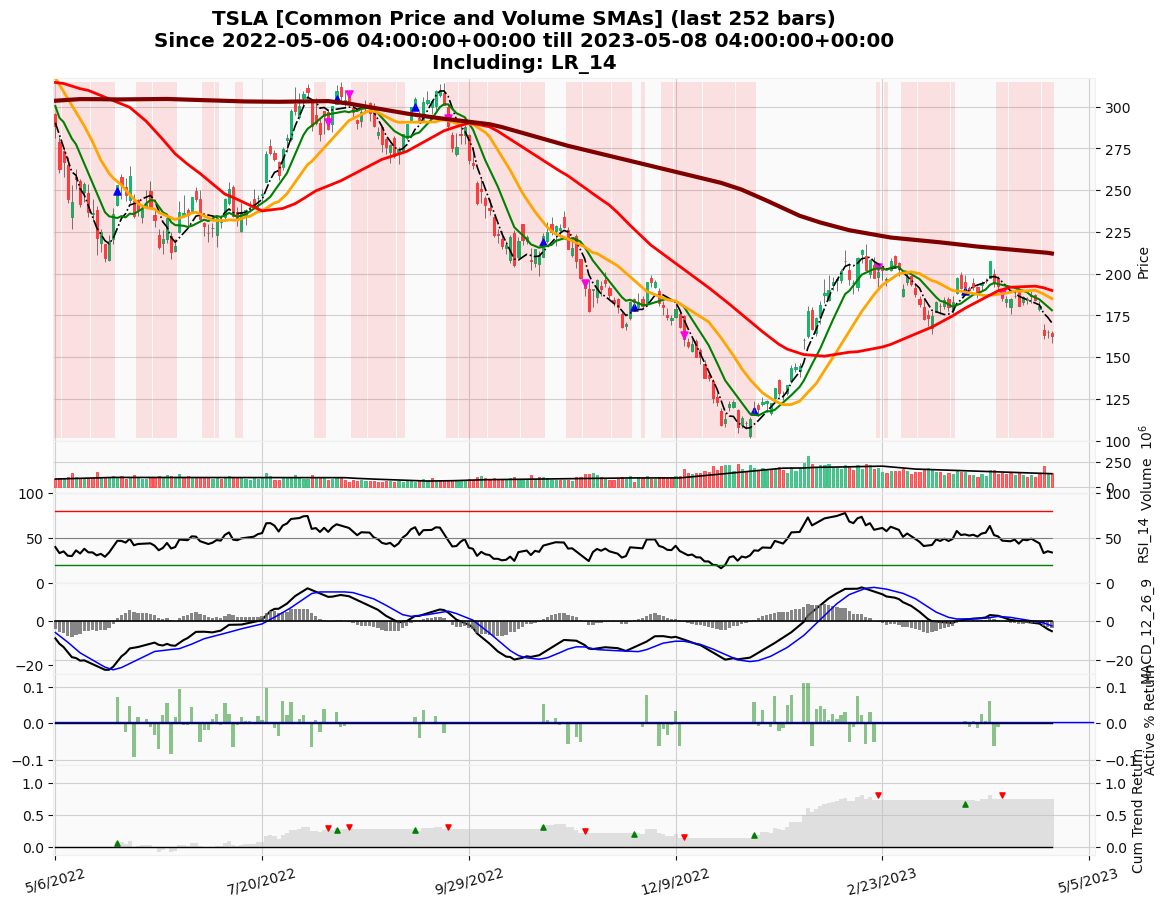


Pandas v: 1.4.2 [pip install pandas] https://github.com/pandas-dev/pandas
Data from AlphaVantage v: 1.0.19 [pip install alphaVantage-api] http://www.alphavantage.co https://github.com/twopirllc/AlphaVantageAPI
Technical Analysis with Pandas TA v: 0.3.14b0 [pip install pandas_ta] https://github.com/twopirllc/pandas-ta
Charts by Matplotlib Finance v: 0.12.10b0 [pip install mplfinance] https://github.com/matplotlib/mplfinance



In [24]:
# Used for example Trend Return Long Trend Below
macd_ = ta.macd(closedf)
macdh = macd_[macd_.columns[1]]

Chart(df,
    # style: which mplfinance chart style to use. Added "random" as an option.
    # rpad: how many bars to leave empty on the right of the chart
    style="yahoo", title=ticker, last=recent_bars(df), rpad=10,
    
    # Overlap Indicators
    linreg=True, midpoint=False, ohlc4=False, archermas=True,
    
    # Example Indicators with default parameters
    volume=True, rsi=True, clr=False, macd=True, zscore=False, squeeze=False, lazybear=False,

    # Archer OBV and OBV MAs (https://www.tradingview.com/script/Co1ksara-Trade-Archer-On-balance-Volume-Moving-Averages-v1/)
    archerobv=False,

    # Create trends and see their returns
    tsignals=True,
    # Example Trends or create your own. Trend must yield Booleans
#     long_trend=ta.sma(closedf,10) > ta.sma(closedf,20), # trend: sma(close,10) > sma(close,20) [Default Example]
#     long_trend=closedf > ta.ema(closedf,5), # trend: close > ema(close,5)
#     long_trend=ta.sma(closedf,10) > ta.ema(closedf,50), # trend: sma(close,10) > ema(close,50)
#     long_trend=ta.increasing(ta.ema(closedf), 10), # trend: increasing(ema, 10)
#     long_trend=macdh > 0, # trend: macd hist > 0
    long_trend=macd_[macd_.columns[0]] > macd_[macd_.columns[-1]], # trend: macd > macd signal
#     long_trend=ta.increasing(ta.sma(ta.rsi(closedf), 10), 5, asint=False), # trend: rising sma(rsi, 10) for the previous 5 periods
#     long_trend=ta.squeeze(highdf, lowdf, closedf, lazybear=True, detailed=True).SQZ_PINC > 0,
#     long_trend=ta.amat(closedf, 50, 200, mamode="sma").iloc[:,0], # trend: amat(50, 200) long signal using sma
    show_nontrading=False, # Intraday use if needed
    verbose=True, # More detail
)

## Indicator Examples
* Examples of simple and complex indicators.  Most indicators return a Series, while a few return DataFrames.
* All indicators can be called one of three ways. Either way, they return the result.

### Three ways to use pandas_ta
1. Stand Alone like TA-Lib  ta.**indicator**(*kwargs*).
2. As a DataFrame Extension like df.ta.**indicator**(*kwargs*).  Where df is a DataFrame with columns named "open", "high", "low", "close, "volume" for simplicity.
3. Similar to #2, but by calling: df.ta(kind="**indicator**", *kwargs*).

### Cumulative Log Return

<AxesSubplot:title={'center':'GOOG: CUMLOGRET_1 from 2022-04-22 04:00:00+00:00 to 2023-04-24 04:00:00+00:00 (252)'}, xlabel='Datetime'>

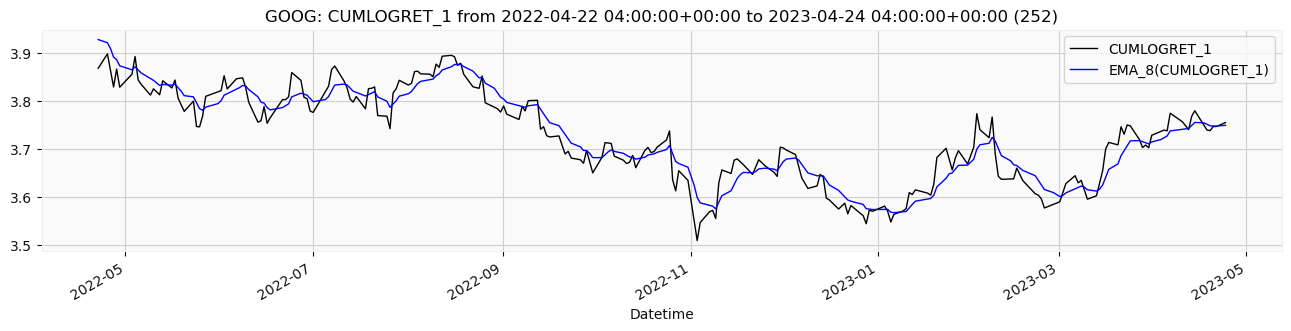

In [12]:
clr_ma_length = 8
clrdf = df.ta.log_return(cumulative=True, append=True)
clrmadf = ta.ema(clrdf, length=clr_ma_length)
clrxdf = pd.DataFrame({f"{clrdf.name}": clrdf, f"{clrmadf.name}({clrdf.name})": clrmadf})
clrxdf.tail(recent_bars(df)).plot(figsize=ind_size, color=colors("BkBl"), linewidth=1, title=ctitle(clrdf.name, ticker=ticker, length=recent_bars(df)), grid=True)

### MACD

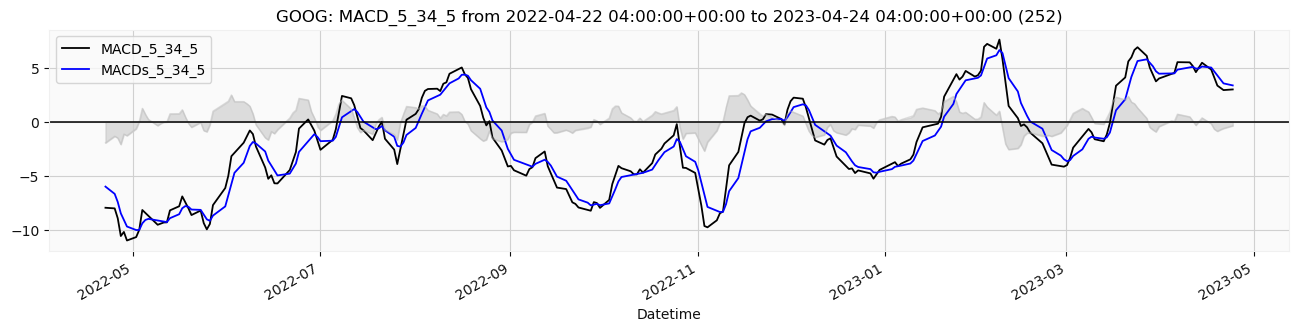

In [13]:
macddf = df.ta.macd(fast=5, slow=34, signal=5, min_periods=None, append=True)
macddf[[macddf.columns[0], macddf.columns[2]]].tail(recent_bars(df)).plot(figsize=(16, 2), color=colors("BkBl"), linewidth=1.3)
macddf[macddf.columns[1]].tail(recent_bars(df)).plot.area(figsize=ind_size, stacked=False, color=["silver"], linewidth=1, title=ctitle(macddf.name, ticker=ticker, length=recent_bars(df)), grid=True).axhline(y=0, color="black", lw=1.1)

### ZScore

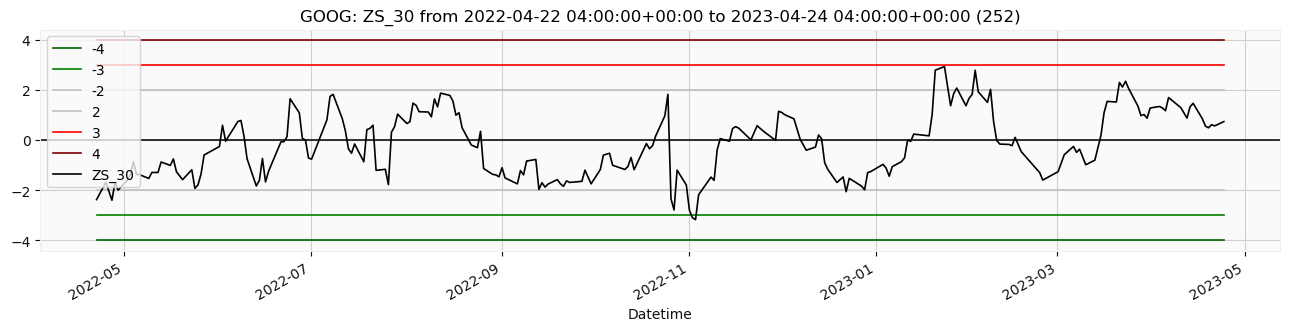

In [14]:
zscoredf = df.ta.zscore(length=30, append=True)
zcolors = ["darkgreen", "green", "silver", "silver", "red", "maroon", "black"]
zcols = df[["-4", "-3", "-2", "2", "3", "4", zscoredf.name]].tail(recent_bars(df))
zcols.plot(figsize=ind_size, color=zcolors, linewidth=1.2, title=ctitle(zscoredf.name, ticker=ticker, length=recent_bars(df)), grid=True).axhline(y=0, color="black", lw=1.1)

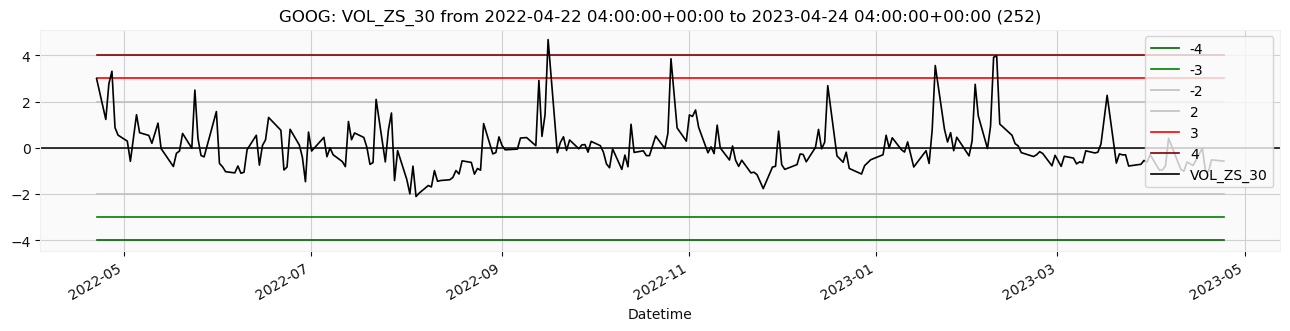

In [15]:
# Now Volume Z Score
zvscoredf = df.ta.zscore(close="volume", length=30, prefix="VOL", append=True)
zcolors = ["darkgreen", "green", "silver", "silver", "red", "maroon", "black"]
zvcols = df[["-4", "-3", "-2", "2", "3", "4", zvscoredf.name]].tail(recent_bars(df))
zvcols.plot(figsize=ind_size, color=zcolors, linewidth=1.2, title=ctitle(zvscoredf.name, ticker=ticker, length=recent_bars(df)), grid=True).axhline(y=0, color="black", lw=1.1)

# New Features

## Squeeze Indicator (John Carter and Lazybear Versions)
Squeeze Indicator (__squeeze__)

In [16]:
# help(ta.squeeze)

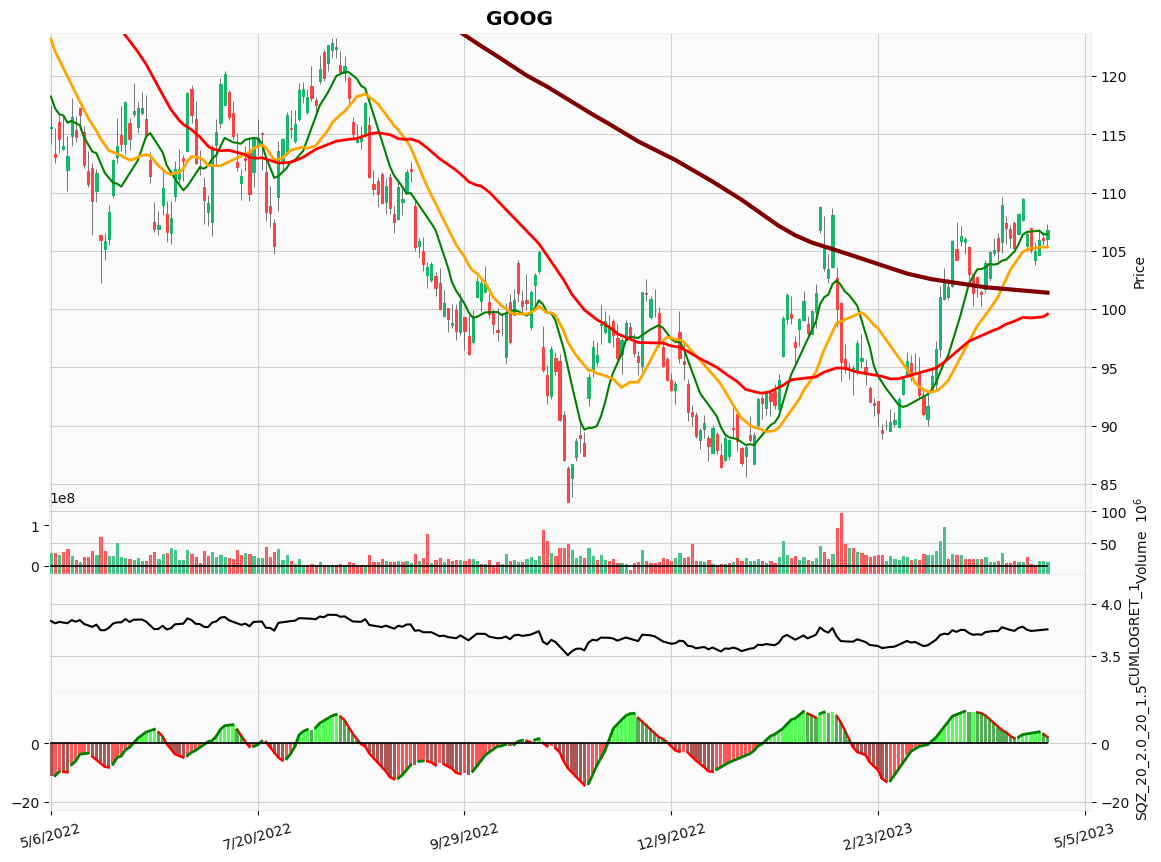


Pandas v: 1.4.2 [pip install pandas] https://github.com/pandas-dev/pandas
Data from AlphaVantage v: 1.0.19 [pip install alphaVantage-api] http://www.alphavantage.co https://github.com/twopirllc/AlphaVantageAPI
Technical Analysis with Pandas TA v: 0.3.14b0 [pip install pandas_ta] https://github.com/twopirllc/pandas-ta
Charts by Matplotlib Finance v: 0.12.10b0 [pip install mplfinance] https://github.com/matplotlib/mplfinance



In [17]:
Chart(df, style="yahoo", title=ticker, verbose=False,
    last=recent_bars(df), rpad=10, clr=True, squeeze=True,
    show_nontrading=True, # Intraday use if needed
)

### Lazybear's TradingView Squeeze

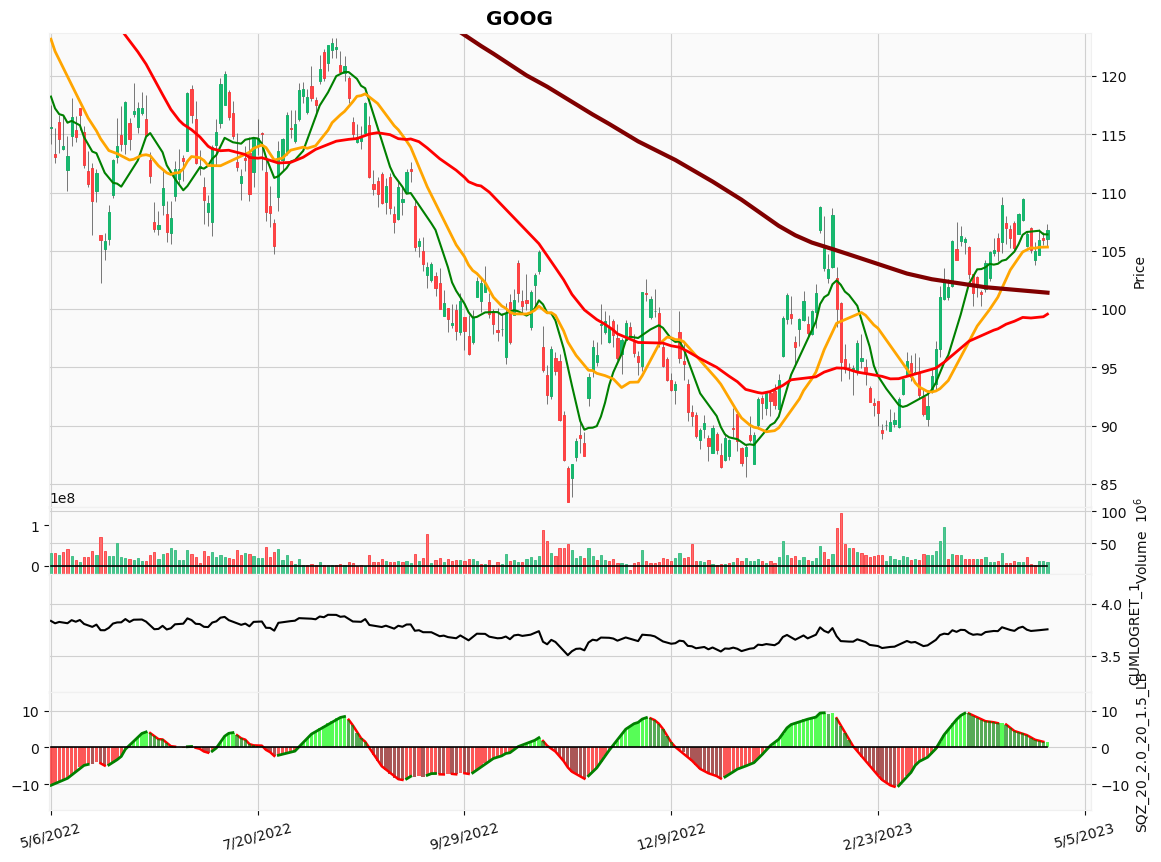


Pandas v: 1.4.2 [pip install pandas] https://github.com/pandas-dev/pandas
Data from AlphaVantage v: 1.0.19 [pip install alphaVantage-api] http://www.alphavantage.co https://github.com/twopirllc/AlphaVantageAPI
Technical Analysis with Pandas TA v: 0.3.14b0 [pip install pandas_ta] https://github.com/twopirllc/pandas-ta
Charts by Matplotlib Finance v: 0.12.10b0 [pip install mplfinance] https://github.com/matplotlib/mplfinance



In [18]:
Chart(df, style="yahoo", title=ticker, verbose=False,
    last=recent_bars(df), rpad=10, clr=True, squeeze=True, lazybear=True,
    show_nontrading=False, # Intraday use if needed
)

### Archer Moving Averages Trends
Archer Moving Average Trends (__amat__) returns the long and short run trends of fast and slow moving averages.
* The _pink_ background, on the Price chart, is when Archer MAs are bearish. Conversely, a _white_ background is bullish

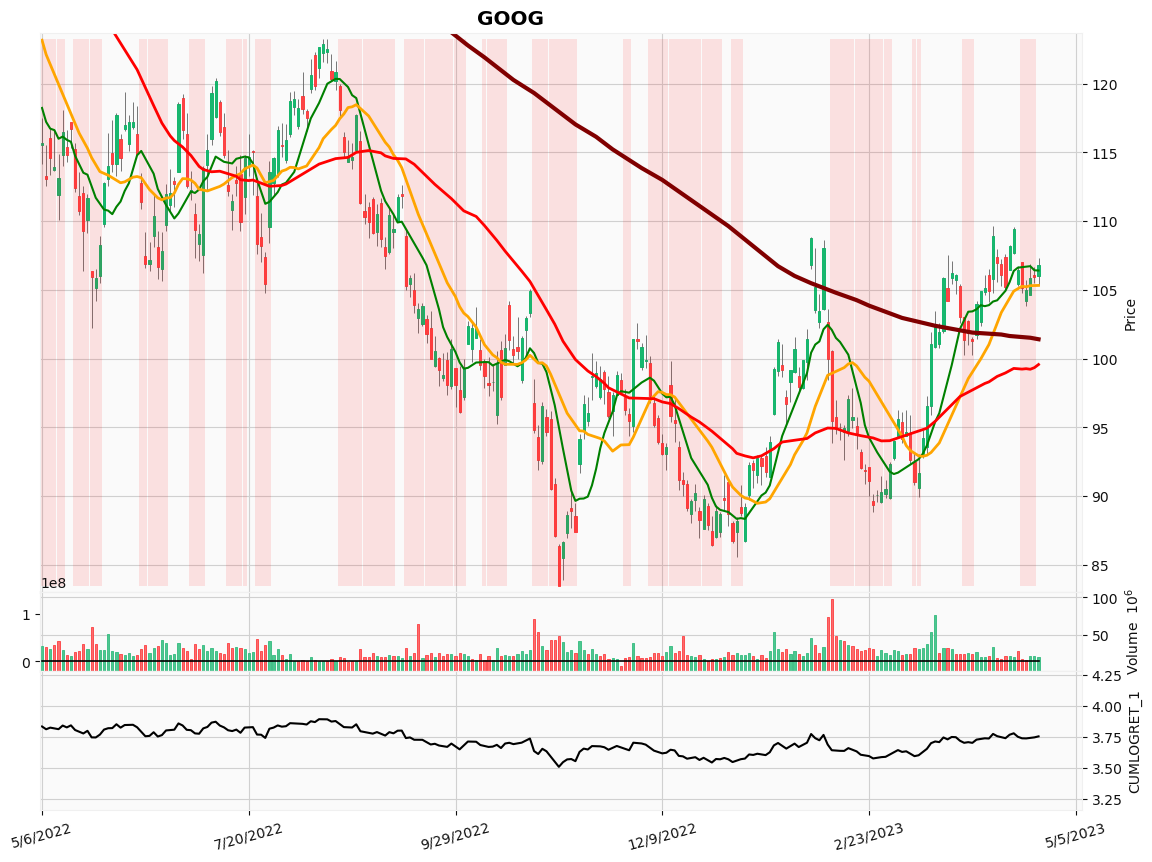


Pandas v: 1.4.2 [pip install pandas] https://github.com/pandas-dev/pandas
Data from AlphaVantage v: 1.0.19 [pip install alphaVantage-api] http://www.alphavantage.co https://github.com/twopirllc/AlphaVantageAPI
Technical Analysis with Pandas TA v: 0.3.14b0 [pip install pandas_ta] https://github.com/twopirllc/pandas-ta
Charts by Matplotlib Finance v: 0.12.10b0 [pip install mplfinance] https://github.com/matplotlib/mplfinance



In [19]:
Chart(df, style="yahoo", title=ticker, verbose=False,
    last=recent_bars(df), rpad=10,
    volume=True, midpoint=False, ohlc4=False,
    rsi=False, clr=True, macd=False, zscore=False, squeeze=False, lazybear=False,
    archermas=True, archerobv=False,
    show_nontrading=False, # Intraday use if needed
)

### Archer On Balance Volume
Archer On Balance Volume (__aobv__) returns a DataFrame of OBV, OBV min and max, fast and slow MAs of OBV, and the long and short run trends of the two OBV MAs.
* On the chart below, only **OBV**, **OBV min**, _fast_ and _slow_ **OBV MAs**.
* Not on the chart are: **OBV LR** and **OBV SR** trends.

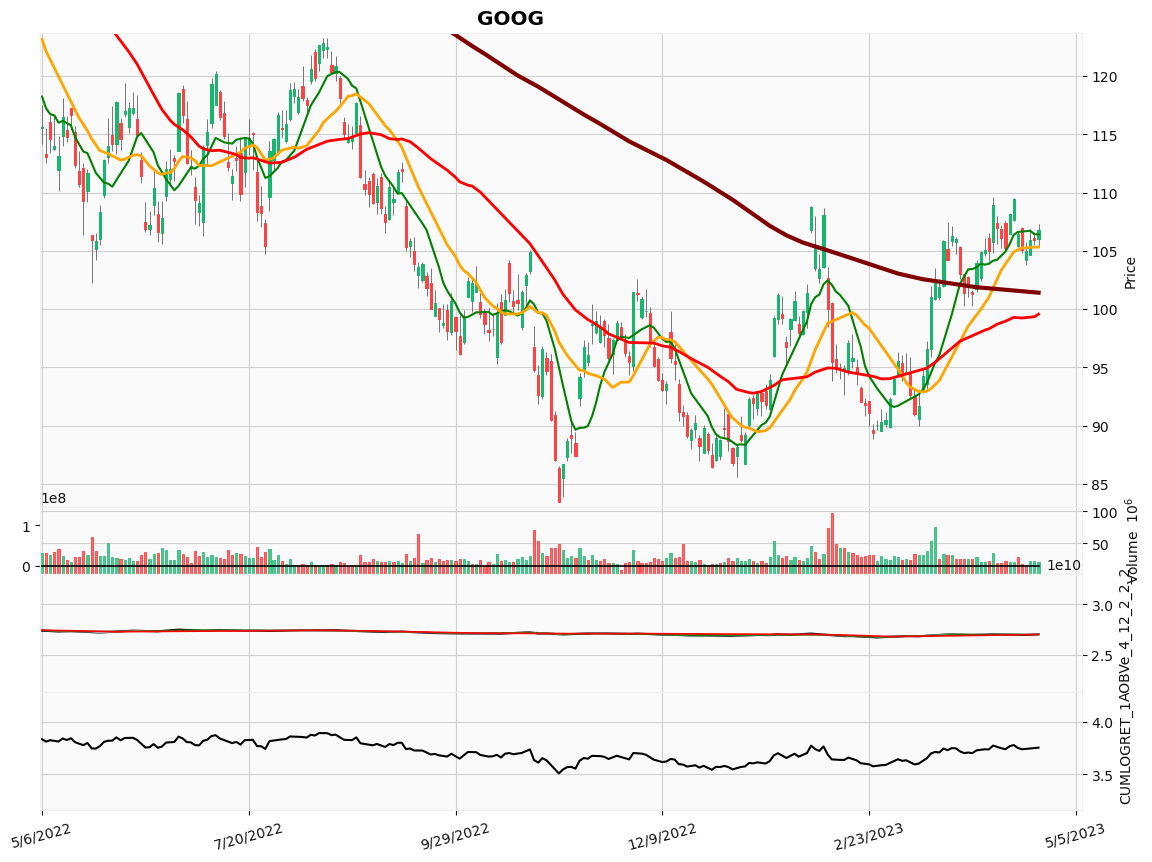


Pandas v: 1.4.2 [pip install pandas] https://github.com/pandas-dev/pandas
Data from AlphaVantage v: 1.0.19 [pip install alphaVantage-api] http://www.alphavantage.co https://github.com/twopirllc/AlphaVantageAPI
Technical Analysis with Pandas TA v: 0.3.14b0 [pip install pandas_ta] https://github.com/twopirllc/pandas-ta
Charts by Matplotlib Finance v: 0.12.10b0 [pip install mplfinance] https://github.com/matplotlib/mplfinance



In [20]:
Chart(df, style="yahoo", title=ticker, verbose=False,
    last=recent_bars(df), rpad=10,
    volume=True, midpoint=False, ohlc4=False,
    rsi=False, clr=True, macd=False, zscore=False, squeeze=False, lazybear=False,
    archermas=False, archerobv=True,
    show_nontrading=False, # Intraday use if needed
)

# Disclaimer
* All investments involve risk, and the past performance of a security, industry, sector, market, financial product, trading strategy, or individual’s trading does not guarantee future results or returns. Investors are fully responsible for any investment decisions they make. Such decisions should be based solely on an evaluation of their financial circumstances, investment objectives, risk tolerance, and liquidity needs.

* Any opinions, news, research, analyses, prices, or other information offered is provided as general market commentary, and does not constitute investment advice. I will not accept liability for any loss or damage, including without limitation any loss of profit, which may arise directly or indirectly from use of or reliance on such information.